<h1> <i>Session 3: Linear Regression.</i> </h1>

<p>This notebook provides an example code of analyzing <b>Customer lifetime value</b> using linear regression. The dependent variable which to be used in OLS model is <b>Customer lifetime value</b>. We would like to understand the realtionship between CLV and other variables in the dataset and also reveal the best model using different selection methods and data transformations.
    
<br>The general sequence of steps for the analysis the following:
1. [Descriptive analysis](#pandas)
2. [Data transformation](#transf)
3.  [Model selection](#select)
4. [Running and building the OLS model /statsmodels/ (backward selection, model transformation, test performance)](#stats)
5. [Checking LR assumptions using residual analysis and statistical tests](#resid)   

<i> <u>Before starting any analysis, first import all the needed libraries.</u></i>

In [1]:
import pandas as pd #pandas for data manipulation, transformation
import matplotlib.pyplot as plt #visualization
import seaborn as sns #visualization
import numpy as np #for scientific computations
import statsmodels.api as sm #statsmodels library
from statsmodels.api import qqplot #for qq plot
from statsmodels.stats.diagnostic import het_breuschpagan,linear_rainbow  #variance equality and linearity tests
from scipy.stats import shapiro #for checking normality
from statsmodels.stats.outliers_influence import variance_inflation_factor #for checking Multicolinearity
from sklearn.model_selection import train_test_split #for train and test split
from sklearn.metrics import r2_score #R-squared

 <h2>1.Descriptive analysis</h2> <a name="pandas"></a>

In [2]:
#importing the data and making a dataframe
data=pd.read_excel("CLV.xlsx")

In [3]:
#data overview
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
Customer                         9134 non-null object
State                            9134 non-null object
Customer_Lifetime_Value          9134 non-null float64
Response                         9134 non-null object
Coverage                         9134 non-null object
Education                        9134 non-null object
Effective_To_Date                9134 non-null datetime64[ns]
EmploymentStatus                 9134 non-null object
Gender                           9134 non-null object
Income                           9134 non-null int64
Location_Code                    9134 non-null object
Marital_Status                   9134 non-null object
Monthly_Premium_Auto             9134 non-null int64
Months_Since_Last_Claim          9134 non-null int64
Months_Since_Policy_Inception    9134 non-null int64
Number_of_Open_Complaints        9134 non-null int64
Number_of_Policies       

We have 24 variables of 9134 observations.

In [4]:
#have a look at first rows of the dataframe
data.head()

,Customer,State,Customer_Lifetime_Value,Response,Coverage,Education,Effective_To_Date,EmploymentStatus,Gender,Income,...,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Total_Claim_Amount,Vehicle_Class,Vehicle_Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
data.describe()

,Customer_Lifetime_Value,Income,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Total_Claim_Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [6]:
#checking for NAs
data.isnull().any()
#data.isnull().sum()

Customer                         False
State                            False
Customer_Lifetime_Value          False
Response                         False
Coverage                         False
Education                        False
Effective_To_Date                False
EmploymentStatus                 False
Gender                           False
Income                           False
Location_Code                    False
Marital_Status                   False
Monthly_Premium_Auto             False
Months_Since_Last_Claim          False
Months_Since_Policy_Inception    False
Number_of_Open_Complaints        False
Number_of_Policies               False
Policy_Type                      False
Policy                           False
Renew_Offer_Type                 False
Sales_Channel                    False
Total_Claim_Amount               False
Vehicle_Class                    False
Vehicle_Size                     False
dtype: bool

In [7]:
#checking whether there are columns having same value for all observations
data.columns[data.nunique()==1]

Index([], dtype='object')

In [8]:
#checking for duplicates, 2 easy ways are:
print(data.duplicated().any())
print("---------------------")
print(data[data.duplicated()])

False
---------------------
Empty DataFrame
Columns: [Customer, State, Customer_Lifetime_Value, Response, Coverage, Education, Effective_To_Date, EmploymentStatus, Gender, Income, Location_Code, Marital_Status, Monthly_Premium_Auto, Months_Since_Last_Claim, Months_Since_Policy_Inception, Number_of_Open_Complaints, Number_of_Policies, Policy_Type, Policy, Renew_Offer_Type, Sales_Channel, Total_Claim_Amount, Vehicle_Class, Vehicle_Size]
Index: []

[0 rows x 24 columns]


Note that in case of having duplicated values we will drop them using <code>drop_duplicates()</code> method

C:\Users\Srbuhi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


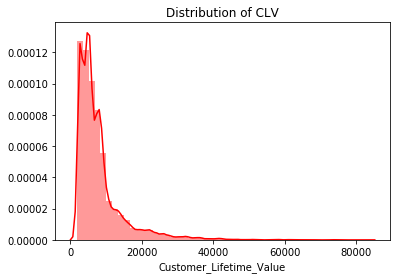

In [9]:
#let's visualise the distribution of CLV
sns.distplot(data.Customer_Lifetime_Value,color="red")
plt.title("Distribution of CLV")
plt.show()

As it can be seen, we have a right-skewed data  of a large scale.

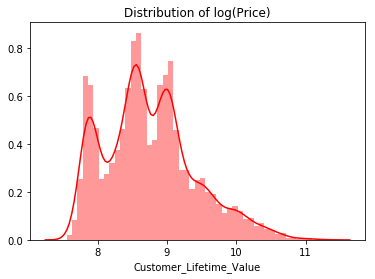

In [10]:
#Lets see what the log(price) distribution will look like
sns.distplot(np.log(data.Customer_Lifetime_Value),color="red")
plt.title("Distribution of log(Price)")
plt.show()

As it can be seen from the plot, the log(Price) distribution hasn't changed the situation to much better one.

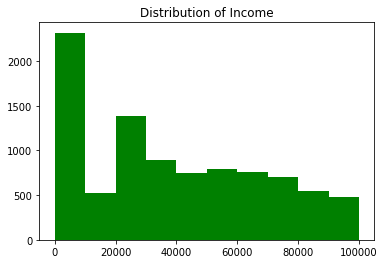

In [11]:
#let's visualise one of explanatory variables
plt.hist(data.Income, color="green")
plt.title("Distribution of Income")
plt.show()

In [12]:
#let's see categories and number of observations in each category for object variables
for i in data.select_dtypes(include="object").columns:
    j=data[i].value_counts()
    print(i,"\n",j,"\n","\n")
    print("--------------------")

Customer 
 SB41594    1
MY56715    1
IU94124    1
QV48556    1
AS97690    1
VA82895    1
EG40670    1
FD45309    1
GG24674    1
VL36269    1
IM15816    1
PG14554    1
SO54368    1
UV82770    1
IB36843    1
RE52529    1
HM41195    1
QS70017    1
WY17333    1
HY43263    1
QS36363    1
NI66988    1
CV63337    1
ZZ22858    1
IV74747    1
CN53343    1
YK60829    1
BR69566    1
No36572    1
AQ34238    1
          ..
YQ16427    1
LE26899    1
IN28584    1
PM78410    1
OZ82391    1
YV93921    1
XY78443    1
CM66204    1
ZK54897    1
MI49191    1
CL52383    1
DQ50258    1
TN71995    1
VP89545    1
QK62680    1
TO55166    1
EG62398    1
CI38171    1
NN79124    1
ME37051    1
QE73187    1
PP97061    1
EB61889    1
UF28233    1
WH81461    1
TB53616    1
XK91603    1
MW80236    1
QQ39596    1
OJ64812    1
Name: Customer, Length: 9134, dtype: int64 
 

--------------------
State 
 California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64

<h1>2.Data transformation </h1> <a name="transf"> </a>

We can see that "Customer" variable has unique values for almost every observation. Let's observe which of the variables can be grouped into categories with less levels.
E.g. for State we can group variables as California, Oregon and Other.Education's Bachelor, Masters and Doctor can be grouped into University_degree. EmploymentStatus as Employed, Unemployed and Other, Marital status as Married and Not_Married, Policy as Personal, Corporate and Special. Let's make the transformations.

In [13]:
#first, let's drop the  "Customer" variable
data.drop("Customer",axis=1,inplace=True)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 23 columns):
State                            9134 non-null object
Customer_Lifetime_Value          9134 non-null float64
Response                         9134 non-null object
Coverage                         9134 non-null object
Education                        9134 non-null object
Effective_To_Date                9134 non-null datetime64[ns]
EmploymentStatus                 9134 non-null object
Gender                           9134 non-null object
Income                           9134 non-null int64
Location_Code                    9134 non-null object
Marital_Status                   9134 non-null object
Monthly_Premium_Auto             9134 non-null int64
Months_Since_Last_Claim          9134 non-null int64
Months_Since_Policy_Inception    9134 non-null int64
Number_of_Open_Complaints        9134 non-null int64
Number_of_Policies               9134 non-null int64
Policy_Type               

In [15]:
data.State.value_counts()

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64

In [16]:
#defining a function to make categories less
def state(x):
    if x in ["Arizona","Nevada", "Washington"]:
        x="Other"
    return x

In [17]:
#applying it to the df
data.State=data.State.apply(state)

In [18]:
data.State.value_counts()

Other         3383
California    3150
Oregon        2601
Name: State, dtype: int64

In [19]:
#Let's make similar changes with above noted other variables
data.Education.value_counts()

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64

In [20]:
#grouping degrees into a separate category
def educ(x):
    if x in ["Bachelor", "Master", "Doctor"]:
        x="University_degree"
    return x

In [21]:
data.Education=data.Education.apply(educ)

In [22]:
#now the feature is more balanced
data.Education.value_counts()

University_degree       3831
College                 2681
High School or Below    2622
Name: Education, dtype: int64

In [23]:
#The same with Employment and Marital statuses
data.EmploymentStatus.value_counts()

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: EmploymentStatus, dtype: int64

In [24]:
#defining a function to make categories less
def employ(x):
    if x in ["Medical Leave","Disabled", "Retired"]:
        x="Other"
    return x

In [25]:
data.EmploymentStatus=data.EmploymentStatus.apply(employ)

In [26]:
data.EmploymentStatus.value_counts()

Employed      5698
Unemployed    2317
Other         1119
Name: EmploymentStatus, dtype: int64

In [27]:
data.Marital_Status.value_counts()

Married     5298
Single      2467
Divorced    1369
Name: Marital_Status, dtype: int64

In [28]:
#defining a function to make categories less
def not_marry(x):
    if x in ["Single","Divorced"]:
        x="Not_Married"
    return x

In [29]:
data.Marital_Status=data.Marital_Status.apply(not_marry)

In [30]:
#more balanced data
data.Marital_Status.value_counts()

Married        5298
Not_Married    3836
Name: Marital_Status, dtype: int64

In [31]:
data.Policy.value_counts()

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: Policy, dtype: int64

In [32]:
def policy(x):
    if x in ["Personal L1", "Personal L2", "Personal L3"]:
        x="Personal"
    elif x in ["Corporate L1", "Corporate L2", "Corporate L3"]:
        x="Corporate"
    else:
        x="Special"
    return x

In [33]:
data.Policy=data.Policy.apply(policy)

In [34]:
data.Policy.value_counts()

Personal     6788
Corporate    1968
Special       378
Name: Policy, dtype: int64

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 23 columns):
State                            9134 non-null object
Customer_Lifetime_Value          9134 non-null float64
Response                         9134 non-null object
Coverage                         9134 non-null object
Education                        9134 non-null object
Effective_To_Date                9134 non-null datetime64[ns]
EmploymentStatus                 9134 non-null object
Gender                           9134 non-null object
Income                           9134 non-null int64
Location_Code                    9134 non-null object
Marital_Status                   9134 non-null object
Monthly_Premium_Auto             9134 non-null int64
Months_Since_Last_Claim          9134 non-null int64
Months_Since_Policy_Inception    9134 non-null int64
Number_of_Open_Complaints        9134 non-null int64
Number_of_Policies               9134 non-null int64
Policy_Type               

 <h3>2.1.Descriptive analysis using visualization</h3>

<i><b>Let's outline some questions that might be insightful from CLV analytics point.</i></b>

      -Is CLV different by Gender,Marital Status? 
      -Relationship between CLV and Income.
      -Income by Vehicle class/size

In [36]:
#Let's see what are values for date and whether it can be useful

In [37]:
data.Effective_To_Date.apply(lambda x: x.year).value_counts()

2011    9134
Name: Effective_To_Date, dtype: int64

In [38]:
data.Effective_To_Date.apply(lambda x: x.month).value_counts()

1    4898
2    4236
Name: Effective_To_Date, dtype: int64

In [39]:
#As it is all about two winter months of the same year, we will drop this column
del data["Effective_To_Date"]

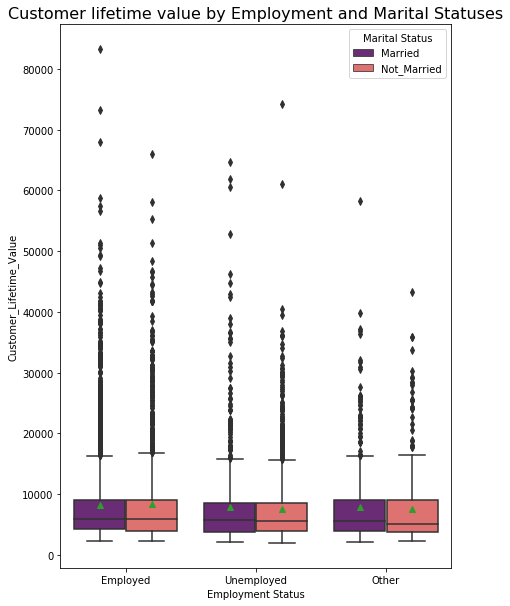

In [40]:
plt.figure(figsize=(7,10))
sns.boxplot(x="EmploymentStatus",y="Customer_Lifetime_Value", data=data, palette='magma',hue=data.Marital_Status,  showmeans=True)
plt.legend(title='Marital Status', loc='upper right')
plt.xlabel("Employment Status")
plt.title("Customer lifetime value by Employment and Marital Statuses",fontdict={"fontsize":16})
plt.show()

As we see, there is no interaction term of marital and employment statuses on CLV, mean values are almost the same. Let's see the relationship between CLV and Income.

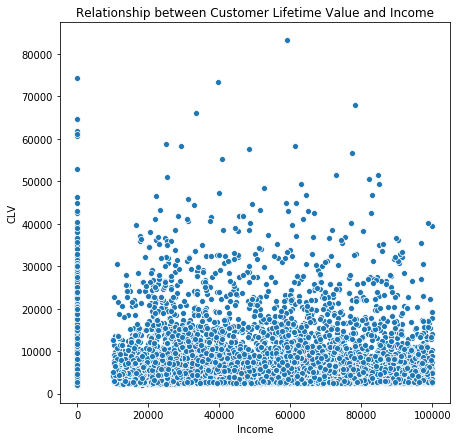

In [41]:
plt.figure(figsize=(7,7))
sns.scatterplot(data.Income,data.Customer_Lifetime_Value,)
plt.xlabel("Income")
plt.ylabel("CLV")
plt.title("Relationship between Customer Lifetime Value and Income")
plt.show()

CLV is a metric that represents the total net profit a company makes from any given customer, thus 0 means there are many customers that are not valuable for the company.

<h1> 3. Model selection </h1> <a name="select"> </a>

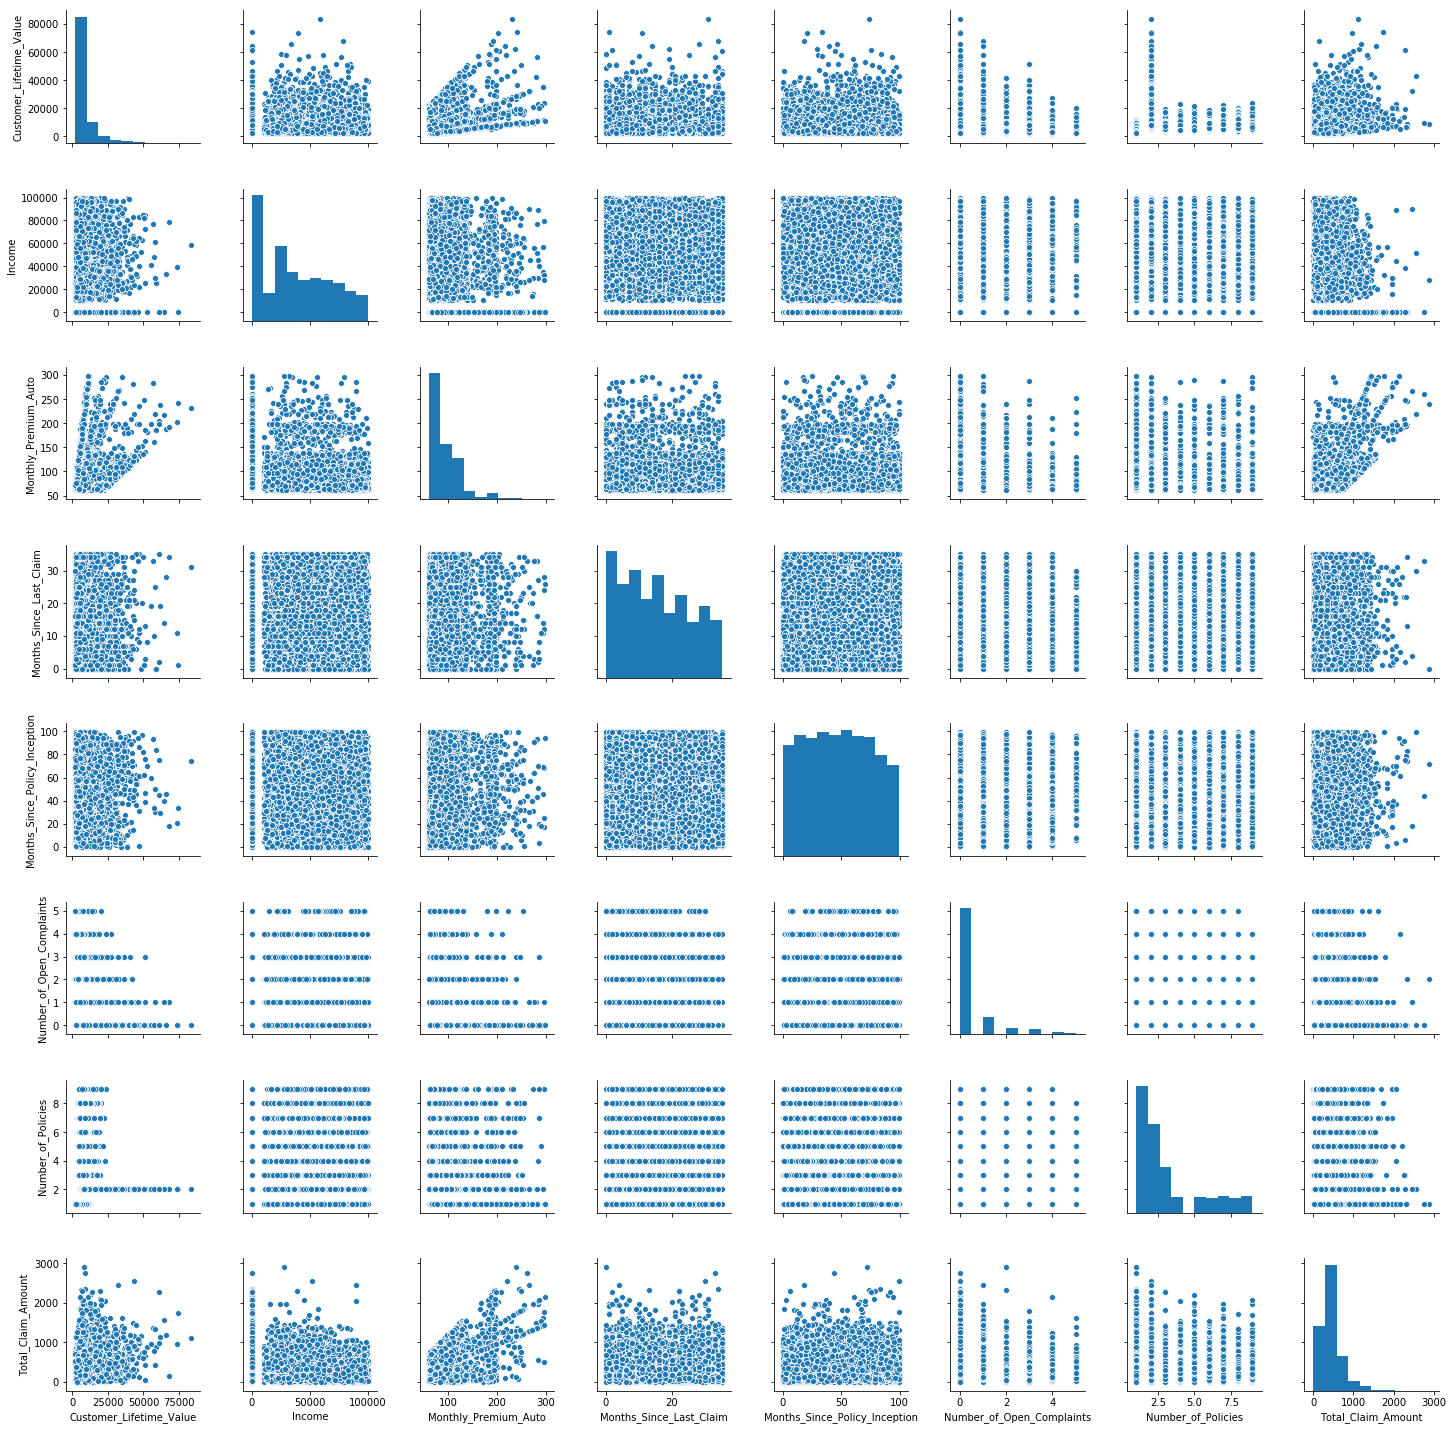

In [42]:
#To see the visual representation of pairwise relationships in a dataset, a pairplot is used. Note that it only plots numeric
#columns.
sns.pairplot(data)

We can clearly see a positive relationship between CLV and Monthly_premium_auto. Several variables (# of open compaints, # of policies etc) seem to have discrete values and would possibly make more sense when transformed into objects (check it yourself).

 <h3><u>Checking for correlations (multicollinearity)</u></h3>

In [43]:
#lets see the corrplot
data.corr()

,Customer_Lifetime_Value,Income,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Total_Claim_Amount
Customer_Lifetime_Value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
Monthly_Premium_Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months_Since_Last_Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months_Since_Policy_Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
Number_of_Open_Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
Number_of_Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
Total_Claim_Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


There are a lot of pairs having high correlation, but the representation is not convenient to see the overall picture, thus we will use some visualizations.

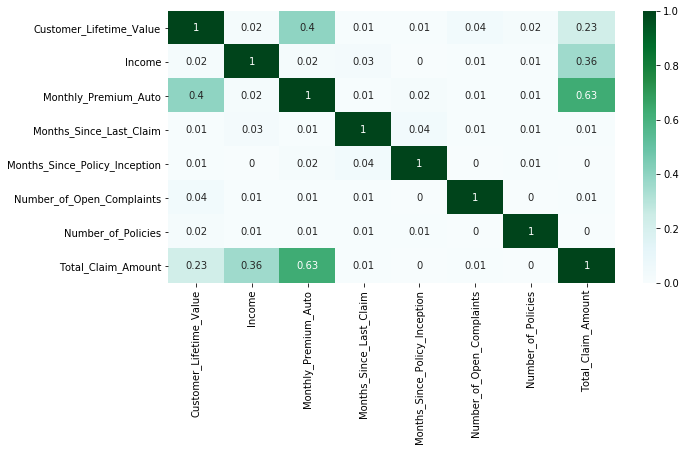

In [44]:
#Let's visualize correlations
plt.figure(figsize=(10,5))
sns.heatmap(data.corr().abs().round(2),annot=True, cmap = "BuGn")

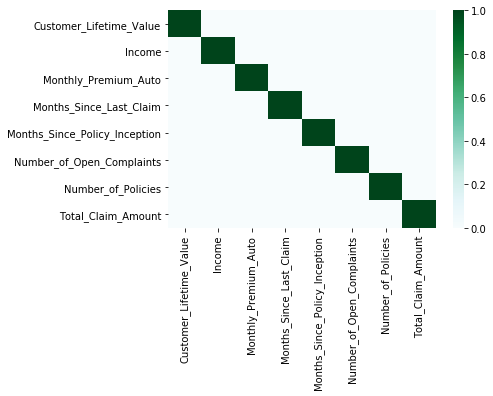

In [45]:
#plot correlation heatmap to see any correlations above or equal to 75% in absolute values
#we will see that number of variables are highly correlated, which will affect the results.
#Thus we will include only several of them in the analysis
sns.heatmap(data.corr().abs()>=0.75, cmap = "BuGn")

### We will not exclude any variable as the corr between variables is less than 0.75.

In [46]:
#let's convert categorical variables in the dataset into dummy variables
data_new=pd.get_dummies(data,drop_first=True)
data_new.head()

,Customer_Lifetime_Value,Income,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Total_Claim_Amount,State_Oregon,State_Other,...,Sales_Channel_Branch,Sales_Channel_Call Center,Sales_Channel_Web,Vehicle_Class_Luxury Car,Vehicle_Class_Luxury SUV,Vehicle_Class_SUV,Vehicle_Class_Sports Car,Vehicle_Class_Two-Door Car,Vehicle_Size_Medsize,Vehicle_Size_Small
0,2763.519279,56274,69,32,5,0,1,384.811147,0,1,...,0,0,0,0,0,0,0,1,1,0
1,6979.535903,0,94,13,42,0,8,1131.464935,0,1,...,0,0,0,0,0,0,0,0,1,0
2,12887.431650,48767,108,18,38,0,2,566.472247,0,1,...,0,0,0,0,0,0,0,1,1,0
3,7645.861827,0,106,18,65,0,7,529.881344,0,0,...,0,1,0,0,0,1,0,0,1,0
4,2813.692575,43836,73,12,44,0,1,138.130879,0,1,...,0,0,0,0,0,0,0,0,1,0


In [47]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 38 columns):
Customer_Lifetime_Value           9134 non-null float64
Income                            9134 non-null int64
Monthly_Premium_Auto              9134 non-null int64
Months_Since_Last_Claim           9134 non-null int64
Months_Since_Policy_Inception     9134 non-null int64
Number_of_Open_Complaints         9134 non-null int64
Number_of_Policies                9134 non-null int64
Total_Claim_Amount                9134 non-null float64
State_Oregon                      9134 non-null uint8
State_Other                       9134 non-null uint8
Response_Yes                      9134 non-null uint8
Coverage_Extended                 9134 non-null uint8
Coverage_Premium                  9134 non-null uint8
Education_High School or Below    9134 non-null uint8
Education_University_degree       9134 non-null uint8
EmploymentStatus_Other            9134 non-null uint8
EmploymentStatus_Unemploy

<h1> 4. Running and building the OLS model /statsmodels/(backward selection, model transformation, test performance)) </h1> <a name="stats">

We will perform 2-step backward stepwise regression and one transformed model. The steps will be as following:
    1. split the data into train and test sets,
    2. build(fit) the model on the train set and see the summary (look at R-squared),
    3. make predictions for the test set and calculate the R-squared,
    4. compare train-test score gap, analyse train model coefficients p-values and make the transformations,
    5. repeat until a desired score is got,
    6. in case of having several competing models (from test score similarity point), check assumptions for all models and    select the one holding all of them. If LINE is not held, transform the data further.
    7. NOTE: Coefficients are interpreted for the models fitted on training set.

In [48]:
#setting the independent and dependent varables
Y=data_new["Customer_Lifetime_Value"]
X=data_new.drop("Customer_Lifetime_Value", axis=1)

In [49]:
X.shape

(9134, 37)

In [50]:
#Splitting the data into train and test sets 0s are for train and 1s for test sets
X0, X1, Y0, Y1 = train_test_split(X, Y, test_size=0.25, random_state=42)

In [51]:
# Adding a constant term to the predictor, the intercept is not included in the model and should be added by the user
X0=sm.add_constant(X0)

In [52]:
model_linear= sm.OLS(Y0,X0)

<b>Next, build the model.</b>

In [53]:
results=model_linear.fit()

<b>Last, see the summary.</b>

In [54]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Customer_Lifetime_Value   R-squared:                       0.173
Model:                                 OLS   Adj. R-squared:                  0.169
Method:                      Least Squares   F-statistic:                     40.68
Date:                     Thu, 26 Sep 2019   Prob (F-statistic):          1.04e-249
Time:                             11:32:29   Log-Likelihood:                -69516.
No. Observations:                     6850   AIC:                         1.391e+05
Df Residuals:                         6814   BIC:                         1.393e+05
Df Model:                               35                                         
Covariance Type:                 nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            496.0938    916.300      0.541      0.588   -1300.139    2292.327
Income                             0.0009      0.004      0.198      0.843      -0.008       0.009
Monthly_Premium_Auto              82.0073     11.482      7.142      0.000      59.500     104.515
Months_Since_Last_Claim            5.8122      7.451      0.780      0.435      -8.794      20.418
Months_Since_Policy_Inception      1.6370      2.711      0.604      0.546      -3.677       6.951
Number_of_Open_Complaints       -307.6361     82.295     -3.738      0.000    -468.959    -146.313
Number_of_Policies                48.1196     31.455      1.530      0.126     -13.542     109.781
Total_Claim_Amount                 0.3065      0.533      0.575      0.565      -0.739       1.352
State_Oregon                    -173.7508    189.752     -0.916      0.360    -545.724     198.222
State_Other                      -43.4018    177.322     -0.245      0.807    -391.009     304.206
Response_Yes                    -302.2380    231.072     -1.308      0.191    -755.211     150.735
Coverage_Extended               -219.6731    285.952     -0.768      0.442    -780.229     340.883
Coverage_Premium                -839.2383    599.753     -1.399      0.162   -2014.941     336.464
Education_High School or Below   481.1557    197.752      2.433      0.015      93.500     868.811
Education_University_degree       82.5746    181.142      0.456      0.649    -272.520     437.669
EmploymentStatus_Other          -238.0096    285.307     -0.834      0.404    -797.301     321.281
EmploymentStatus_Unemployed     -571.5548    309.102     -1.849      0.064   -1177.491      34.382
Gender_M                         -59.5933    151.308     -0.394      0.694    -356.204     237.018
Location_Code_Suburban          -549.1497    299.575     -1.833      0.067   -1136.410      38.111
Location_Code_Urban             -219.2276    274.547     -0.799      0.425    -757.426     318.971
Marital_Status_Not_Married      -166.0147    163.684     -1.014      0.311    -486.886     154.856
Policy_Type_Personal Auto        121.4191     92.315      1.315      0.188     -59.548     302.386
Policy_Type_Special Auto         224.1825    199.590      1.123      0.261    -167.075     615.440
Policy_Personal                  121.4191     92.315      1.315      0.188     -59.548     302.386
Policy_Special                   224.1825    199.590      1.123      0.261    -167.075     615.440
Renew_Offer_Type_Offer2         -964.2080    187.943     -5.130      0.000   -1332.636    -595.780
Renew_Offer_Type_Offer3         -582.1572    228.782     -2.545      0.011   -1030.641    -133.674
Renew_Offer_Type_Offer4        -1362.3742    263.863     -

In [55]:
#not significant variables ones
results.pvalues[results.pvalues>0.05]

const                            0.588243
Income                           0.843119
Months_Since_Last_Claim          0.435369
Months_Since_Policy_Inception    0.545972
Number_of_Policies               0.126116
Total_Claim_Amount               0.565438
State_Oregon                     0.359871
State_Other                      0.806648
Response_Yes                     0.190924
Coverage_Extended                0.442386
Coverage_Premium                 0.161766
Education_University_degree      0.648508
EmploymentStatus_Other           0.404185
EmploymentStatus_Unemployed      0.064489
Gender_M                         0.693701
Location_Code_Suburban           0.066832
Location_Code_Urban              0.424605
Marital_Status_Not_Married       0.310504
Policy_Type_Personal Auto        0.188465
Policy_Type_Special Auto         0.261385
Policy_Personal                  0.188465
Policy_Special                   0.261385
Sales_Channel_Branch             0.056354
Sales_Channel_Call Center        0

In [56]:
#The R-squared and R-squared adjusted of the first model including all the variables, are the following, in respective order:
#0.173 and 0.169
#Let's see how the model performs on the test set (external validity) and then check its internal validity.

In [57]:
#predicting for train and test data
Y1_linear=results.predict(sm.add_constant(X1))
Y0_linear=results.predict(X0)

In [58]:
#let's see r-squared for train and test sets for the initial model
print("R-squared Train:",r2_score(Y0,Y0_linear))
print("R-squared Test:",r2_score(Y1,Y1_linear))

R-squared Train: 0.1728468555691267
R-squared Test: 0.1480052645896418


We can see a huge underfitting problem here: 17.3 on train set vs 14.8 on test set.
Let's transform the data using log-linear model and making some backward selection.
We will drop features based on their p-value size. 
Let's make a new dataframe and then drop the noted features to avoid dropping columns by every category name created by dummies.

In [59]:
#dropping 
data_tr=data.drop(["State","Education", "Gender","Vehicle_Class","Total_Claim_Amount","Marital_Status","Months_Since_Policy_Inception"], axis=1)

In [60]:
data_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 15 columns):
Customer_Lifetime_Value      9134 non-null float64
Response                     9134 non-null object
Coverage                     9134 non-null object
EmploymentStatus             9134 non-null object
Income                       9134 non-null int64
Location_Code                9134 non-null object
Monthly_Premium_Auto         9134 non-null int64
Months_Since_Last_Claim      9134 non-null int64
Number_of_Open_Complaints    9134 non-null int64
Number_of_Policies           9134 non-null int64
Policy_Type                  9134 non-null object
Policy                       9134 non-null object
Renew_Offer_Type             9134 non-null object
Sales_Channel                9134 non-null object
Vehicle_Size                 9134 non-null object
dtypes: float64(1), int64(5), object(9)
memory usage: 1.0+ MB


In [61]:
#transforming our right-skewed data
data_tr["Customer_Lifetime_Value"]=np.log(data_tr["Customer_Lifetime_Value"])

In [62]:
#getting dummies out of the transformed data
data_tr=pd.get_dummies(data_tr,drop_first=True)

In [63]:
data_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 25 columns):
Customer_Lifetime_Value        9134 non-null float64
Income                         9134 non-null int64
Monthly_Premium_Auto           9134 non-null int64
Months_Since_Last_Claim        9134 non-null int64
Number_of_Open_Complaints      9134 non-null int64
Number_of_Policies             9134 non-null int64
Response_Yes                   9134 non-null uint8
Coverage_Extended              9134 non-null uint8
Coverage_Premium               9134 non-null uint8
EmploymentStatus_Other         9134 non-null uint8
EmploymentStatus_Unemployed    9134 non-null uint8
Location_Code_Suburban         9134 non-null uint8
Location_Code_Urban            9134 non-null uint8
Policy_Type_Personal Auto      9134 non-null uint8
Policy_Type_Special Auto       9134 non-null uint8
Policy_Personal                9134 non-null uint8
Policy_Special                 9134 non-null uint8
Renew_Offer_Type_Offer2 

In [64]:
#separating Y and X
Y_tr=data_tr["Customer_Lifetime_Value"]
X_tr=data_tr.drop("Customer_Lifetime_Value", axis=1)
X_tr=sm.add_constant(X_tr)

In [65]:
#splitting the transformed data into training and testing sets
X0_tr,X1_tr,Y0_tr,Y1_tr=train_test_split(X_tr,Y_tr, test_size=0.25, random_state=42)

In [66]:
#building(fitting)
results_tr=sm.OLS(Y0_tr, X0_tr).fit()

In [67]:
results_tr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Customer_Lifetime_Value   R-squared:                       0.254
Model:                                 OLS   Adj. R-squared:                  0.252
Method:                      Least Squares   F-statistic:                     105.8
Date:                     Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                             11:32:29   Log-Likelihood:                -5753.7
No. Observations:                     6850   AIC:                         1.155e+04
Df Residuals:                         6827   BIC:                         1.171e+04
Df Model:                               22                                         
Covariance Type:                 nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           7.8806      0.046    171.656      0.000       7.791       7.971
Income                       4.628e-07   3.96e-07      1.168      0.243   -3.14e-07    1.24e-06
Monthly_Premium_Auto            0.0081      0.000     36.725      0.000       0.008       0.009
Months_Since_Last_Claim         0.0004      0.001      0.612      0.540      -0.001       0.002
Number_of_Open_Complaints      -0.0382      0.007     -5.135      0.000      -0.053      -0.024
Number_of_Policies              0.0512      0.003     17.989      0.000       0.046       0.057
Response_Yes                   -0.0293      0.021     -1.411      0.158      -0.070       0.011
Coverage_Extended               0.0340      0.016      2.138      0.033       0.003       0.065
Coverage_Premium                0.0170      0.026      0.641      0.522      -0.035       0.069
EmploymentStatus_Other         -0.0262      0.026     -1.014      0.310      -0.077       0.024
EmploymentStatus_Unemployed    -0.0761      0.027     -2.792      0.005      -0.130      -0.023
Location_Code_Suburban         -0.0408      0.020     -2.077      0.038      -0.079      -0.002
Location_Code_Urban            -0.0157      0.022     -0.699      0.485      -0.060       0.028
Policy_Type_Personal Auto       0.0074      0.008      0.880      0.379      -0.009       0.024
Policy_Type_Special Auto        0.0250      0.018      1.384      0.166      -0.010       0.060
Policy_Personal                 0.0074      0.008      0.880      0.379      -0.009       0.024
Policy_Special                  0.0250      0.018      1.384      0.166      -0.010       0.060
Renew_Offer_Type_Offer2        -0.1262      0.017     -7.547      0.000      -0.159      -0.093
Renew_Offer_Type_Offer3        -0.0774      0.021     -3.758      0.000      -0.118      -0.037
Renew_Offer_Type_Offer4        -0.1542      0.024     -6.551      0.000      -0.200      -0.108
Sales_Channel_Branch            0.0224      0.017      1.321      0.186      -0.011       0.056
Sales_Channel_Call Center       0.0229      0.019      1.196      0.232      -0.015       0.060
Sales_Channel_Web               0.0076      0.021      0.357      0.721      -0.034       0.049
Vehicle_Size_Medsize            0.0457      0.023      2.017      0.044       0.001       0.090
Vehicle_Size_Small              0.0427      0.026      1.617      0.106      -0.009       0.095
==============================================================================
Omnibus:                     1072.041   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1643.252
Skew:                           1.135   Prob(JB):                         0.00
Kurtosis:               

Although the R squared and R squared adjusted are still very small, we have a huge progress, which can be improved further by backward selection.
Let's see the transformed model's external validity.

In [68]:
#making predictions for train and test sets to see the performance of the model
Y0_linear_tr=results_tr.predict(X0_tr)
Y1_linear_tr=results_tr.predict(X1_tr)

In [69]:
#let's see r-squared for train and test sets for the transformed model
print("R-squared Train:",r2_score(Y0_tr,Y0_linear_tr))
print("R-squared Test:",r2_score(Y1_tr,Y1_linear_tr))

R-squared Train: 0.25427328440096497
R-squared Test: 0.24113852662460378


So from external validity point, the transformed model performs better. Thus we will check assumptions for that model.
Model can surely can be further improved by backward elimination and further variable transformations.

<h1>5.Checking LR assumptions using residual analysis (visual evidence)</h1><a name="resid"></a>

To check the assumptions using residual analysis we will plot the fitted values vs error terms (residuals). It should not exhibit any patterns (should be randomly distributed) to meet the Linearity, Normality and Independence assumptions.

In [70]:
#residuals of the model
residuals=results_tr.resid
predicted_values=results_tr.predict()

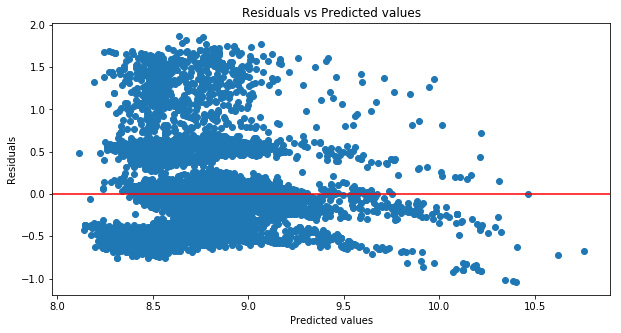

In [71]:
#lets plot predicted values vs residuals
plt.figure(figsize=(10,5))
plt.scatter(predicted_values,residuals)
plt.axhline(y=0, c="red")
plt.title("Residuals vs Predicted values")
plt.ylabel("Residuals")
plt.xlabel("Predicted values")
plt.show()

The residuals vs fitted values plot pattern is not totally random and we can see some curvy patterns there.

C:\Users\Srbuhi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


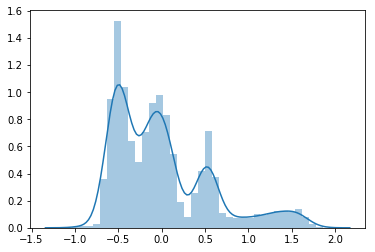

In [72]:
#Normality
#visual presentation- histogram
sns.distplot(residuals)
plt.show()

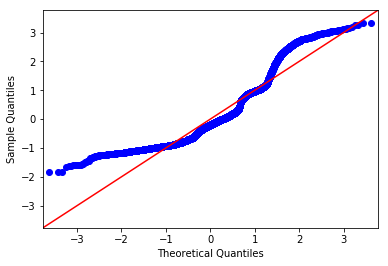

In [73]:
#QQ plot
qqplot(residuals,fit=True, line='45')
plt.show()

The residuals distribution plot shows that the distribution is not normal.
QQ-plot shows a nonlinear pattern too.

<h2>Diagnostic tests for LINE assumptions </h2>

In [74]:
#Linearity 
#The null hypothesis assumes that the regression is correctly modelled as linear
rnames=["fstat", "p-value"]
rainbow=linear_rainbow(results_tr)
print(list(zip(rnames, rainbow)))

[('fstat', 1.0188395756712318), ('p-value', 0.2928280913248587)]


Linearity assumption is held at 5% significance level (p-value=0.29>0.05).

In [75]:
#Breusch-Pagan test for homoscedasticity
#The null hypothesis assumes homoskedasticity
bnames = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
breush = het_breuschpagan(residuals, results_tr.model.exog)
print(list(zip(bnames, breush)))


[('Lagrange multiplier statistic', 582.3118814513908), ('p-value', 1.1843320163615152e-107), ('f-value', 28.83072049618272), ('f p-value', 2.4210857988199917e-114)]


In [76]:
#We reject the null hypothesis based on 5% significance level, thus homoscedasticity assumption is not held.

In [77]:
#Shapiro-Wilk normality test. 
#The null-hypothesis of this test is that the data was drawn from a normal distribution
snames=['The test statistic', 'p-value']
shapiro=shapiro(residuals)
print(list(zip(snames, shapiro)))

[('The test statistic', 0.8924798965454102), ('p-value', 0.0)]


C:\Users\Srbuhi\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Test confirms that the data was not drawn from a normal distribution.

In [78]:
#defining colnames 
var=data_tr.columns.tolist()

In [79]:
#Multicollinearity
#calculating vif using variance_inflation_factor() function from statsmodel
vif = [variance_inflation_factor(data_tr[var].values, i) for i in range(0,len(var))]
print(vif)

C:\Users\Srbuhi\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


[46.206656382329534, 7.642491051665526, 12.24639381838714, 3.2258211652468067, 1.1806865786685687, 2.6667036042197765, 1.3314763466638497, 1.6465783962914071, 1.4030194061941617, 1.756786900955296, 3.8870359481749763, 5.1630494537157565, 1.8809456907760644, inf, inf, inf, inf, 1.9191504225231806, 1.4248053577000843, 1.34772885937982, 1.7509573267651992, 1.5401958694704017, 1.417390107535017, 7.597252169572411, 2.868217450315615]


In [80]:
#printing vif values together with variable names
for i in range(0,len(var)):
    print(var[i],":",vif[i])

Customer_Lifetime_Value : 46.206656382329534
Income : 7.642491051665526
Monthly_Premium_Auto : 12.24639381838714
Months_Since_Last_Claim : 3.2258211652468067
Number_of_Open_Complaints : 1.1806865786685687
Number_of_Policies : 2.6667036042197765
Response_Yes : 1.3314763466638497
Coverage_Extended : 1.6465783962914071
Coverage_Premium : 1.4030194061941617
EmploymentStatus_Other : 1.756786900955296
EmploymentStatus_Unemployed : 3.8870359481749763
Location_Code_Suburban : 5.1630494537157565
Location_Code_Urban : 1.8809456907760644
Policy_Type_Personal Auto : inf
Policy_Type_Special Auto : inf
Policy_Personal : inf
Policy_Special : inf
Renew_Offer_Type_Offer2 : 1.9191504225231806
Renew_Offer_Type_Offer3 : 1.4248053577000843
Renew_Offer_Type_Offer4 : 1.34772885937982
Sales_Channel_Branch : 1.7509573267651992
Sales_Channel_Call Center : 1.5401958694704017
Sales_Channel_Web : 1.417390107535017
Vehicle_Size_Medsize : 7.597252169572411
Vehicle_Size_Small : 2.868217450315615


As we see for some variables we have >5 VIF values, so the there are highly correlated variables in the model. We should drop the correlated variables one by one. We also have variables with inf notation meaning 

<b>!Note: To choose the best model, we also should compare the model diagnostics for the models we outlined and select the one 
    having better test results and/or passing diagnostic tests</b>. In case of failing LINE assumptions, the analysis/transformation
    should be continued to have BLUE.